# Credit One Data Analysis

## Import Libraries

In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling as pp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import numpy as np

%matplotlib inline

# Initiate Seaborn graph background
sns.set()

## Import Data from .csv file, Pre-Processing and Data Transformation in C2T1

In [2]:
# Import data back in
df = pd.read_csv('Credit_One_Data.csv')

In [3]:
# Check data that was imported
df.head()

,Unnamed: 0,ID,Credit_Given,Gender,Education,Marital_Status,Age,PH_Sept_05,PH_Aug_05,PH_Jul_05,...,PAmt_Sept_05,PAmt_Aug_05,PAmt_Jul_05,PAmt_Jun_05,PAmt_May_05,PAmt_Apr_05,Client_Behavior,Gender_coded,Education_coded,Client_Behavior_coded
0,1,1,20000,female,university,1,24,2,2,-1,...,0,689,0,0,0,0,default,2,2,1
1,2,2,120000,female,university,2,26,-1,2,0,...,0,1000,1000,1000,0,2000,default,2,2,1
2,3,3,90000,female,university,2,34,0,0,0,...,1518,1500,1000,1000,1000,5000,not default,2,2,0
3,4,4,50000,female,university,1,37,0,0,0,...,2000,2019,1200,1100,1069,1000,not default,2,2,0
4,5,5,50000,male,university,1,57,-1,0,-1,...,2000,36681,10000,9000,689,679,not default,1,2,0


In [4]:
# Add features for gender, education, and client behavio to have numerical data types for the predictive model. 
df['Marriage_Status']=df['Marital_Status']

codings = {"Marriage_Status": {0: 'Other', 1: 'Married', 2: 'Single', 3: 'Divorced'}} 

df = df.replace(codings)
df.head()

,Unnamed: 0,ID,Credit_Given,Gender,Education,Marital_Status,Age,PH_Sept_05,PH_Aug_05,PH_Jul_05,...,PAmt_Aug_05,PAmt_Jul_05,PAmt_Jun_05,PAmt_May_05,PAmt_Apr_05,Client_Behavior,Gender_coded,Education_coded,Client_Behavior_coded,Marriage_Status
0,1,1,20000,female,university,1,24,2,2,-1,...,689,0,0,0,0,default,2,2,1,Married
1,2,2,120000,female,university,2,26,-1,2,0,...,1000,1000,1000,0,2000,default,2,2,1,Single
2,3,3,90000,female,university,2,34,0,0,0,...,1500,1000,1000,1000,5000,not default,2,2,0,Single
3,4,4,50000,female,university,1,37,0,0,0,...,2019,1200,1100,1069,1000,not default,2,2,0,Married
4,5,5,50000,male,university,1,57,-1,0,-1,...,36681,10000,9000,689,679,not default,1,2,0,Married


In [5]:
# Verify the datatype of each feature and dependent variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             30000 non-null  int64 
 1   ID                     30000 non-null  int64 
 2   Credit_Given           30000 non-null  int64 
 3   Gender                 30000 non-null  object
 4   Education              30000 non-null  object
 5   Marital_Status         30000 non-null  int64 
 6   Age                    30000 non-null  int64 
 7   PH_Sept_05             30000 non-null  int64 
 8   PH_Aug_05              30000 non-null  int64 
 9   PH_Jul_05              30000 non-null  int64 
 10  PH_Jun_05              30000 non-null  int64 
 11  PH_May_05              30000 non-null  int64 
 12  PH_Apr_05              30000 non-null  int64 
 13  Amt_Sept_05            30000 non-null  int64 
 14  Amt_Aug_05             30000 non-null  int64 
 15  Amt_Jul_05         

### Attribute information

```
Credit Given (NT dollar): both the individual consumer credit and his/her family (supplementary) credit.
Gender (1 = male; 2 = female).
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
Age (year).
Payment History. We tracked the past monthly payment records (from April to September, 2005) as follows: 
  PH_Sept_05 = the repayment status in September, 2005; 
  PH_Aug_05= the repayment status in August, 2005; . . .;
  PH_Apr_05 = the repayment status in April, 2005.
  The measurement scale for the repayment status is:
    -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 
    1 = payment delay for one month; 2 = payment delay for two months; . . .; 
    8 = payment delay for eight months; 9 = payment delay for nine months and above.
Amount of bill statement (NT dollar). 
  Amt_Sept_05 = amount of bill statement in September, 2005; 
  Amt_Aug_05 = amount of bill statement in August, 2005; . . .; 
  Amt_Apr_05 = amount of bill statement in April, 2005.
Amount of previous payment (NT dollar). 
  PAmt_Sept_05 = amount paid in September, 2005; 
  PAmt_Aug_05 = amount paid in August, 2005; . . .;
  PAmt_Apr_05 = amount paid in April, 2005.
Client_behavior; Y=0 then not default, Y=1 then default"
```

# Exploratory Data Analysis

In [6]:
# Look at the column names
header = df.dtypes.index
print(header)

Index(['Unnamed: 0', 'ID', 'Credit_Given', 'Gender', 'Education',
       'Marital_Status', 'Age', 'PH_Sept_05', 'PH_Aug_05', 'PH_Jul_05',
       'PH_Jun_05', 'PH_May_05', 'PH_Apr_05', 'Amt_Sept_05', 'Amt_Aug_05',
       'Amt_Jul_05', 'Amt_Jun_05', 'Amt_May_05', 'Amt_Apr_05', 'PAmt_Sept_05',
       'PAmt_Aug_05', 'PAmt_Jul_05', 'PAmt_Jun_05', 'PAmt_May_05',
       'PAmt_Apr_05', 'Client_Behavior', 'Gender_coded', 'Education_coded',
       'Client_Behavior_coded', 'Marriage_Status'],
      dtype='object')


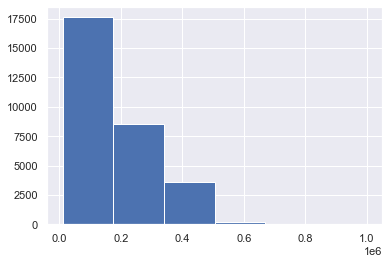

In [7]:
# Review of the amount of credit given to each customer
# Historgram of Credit Given
plt.hist(df['Credit_Given'], bins = 6)
plt.show()

### Correlation

In [245]:
pd.set_option('display.max_columns',None)
corrMat = df.corr()
print(corrMat)

                       Unnamed: 0        ID  Credit_Given  Marital_Status  \
Unnamed: 0               1.000000  0.999998      0.026171       -0.029100   
ID                       0.999998  1.000000      0.026179       -0.029079   
Credit_Given             0.026171  0.026179      1.000000       -0.108139   
Marital_Status          -0.029100 -0.029079     -0.108139        1.000000   
Age                      0.018690  0.018678      0.144713       -0.414170   
PH_Sept_05              -0.030576 -0.030575     -0.271214        0.019917   
PH_Aug_05               -0.011207 -0.011215     -0.296382        0.024199   
PH_Jul_05               -0.018497 -0.018494     -0.286123        0.032688   
PH_Jun_05               -0.002730 -0.002735     -0.267460        0.033122   
PH_May_05               -0.022204 -0.022199     -0.249411        0.035629   
PH_Apr_05               -0.020267 -0.020270     -0.235195        0.034345   
Amt_Sept_05              0.019394  0.019389      0.285430       -0.023472   

In [244]:
covMat = df.cov()
print(covMat)

                         Unnamed: 0            ID  Credit_Given  \
Unnamed: 0             7.504331e+07  7.502277e+07  2.941593e+07   
ID                     7.502277e+07  7.500250e+07  2.941664e+07   
Credit_Given           2.941593e+07  2.941664e+07  1.683446e+10   
Marital_Status        -1.315816e+02 -1.314525e+02 -7.323670e+03   
Age                    1.492448e+03  1.491057e+03  1.730767e+05   
PH_Sept_05            -2.976630e+02 -2.975726e+02 -3.954593e+04   
PH_Aug_05             -1.162288e+02 -1.162770e+02 -4.603765e+04   
PH_Jul_05             -1.917761e+02 -1.916922e+02 -4.443225e+04   
PH_Jun_05             -2.764635e+01 -2.769132e+01 -4.057181e+04   
PH_May_05             -2.179650e+02 -2.178600e+02 -3.667056e+04   
PH_Apr_05             -2.019011e+02 -2.018774e+02 -3.509308e+04   
Amt_Sept_05            1.237153e+07  1.236447e+07  2.727020e+09   
Amt_Aug_05             1.108842e+07  1.108392e+07  2.570130e+09   
Amt_Jul_05             1.463244e+07  1.462688e+07  2.548533e+0

## Analysis

In [12]:
# Check the number of customers in each type of category:
marital = df.groupby('Marital_Status')['Marital_Status'].count()
gender = df.groupby('Gender_coded')['Gender_coded'].count()
education = df.groupby('Education_coded')['Education_coded'].count()
print(marital,gender, education)

Marital_Status
0       54
1    13659
2    15964
3      323
Name: Marital_Status, dtype: int64 Gender_coded
1    11888
2    18112
Name: Gender_coded, dtype: int64 Education_coded
1    10585
2    14030
3     4917
4      468
Name: Education_coded, dtype: int64


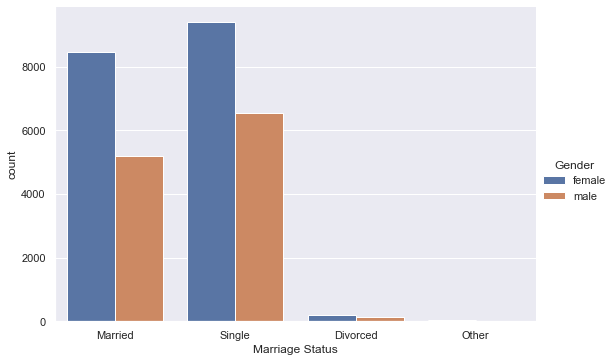

In [60]:
# Figure showing Marriage status: 0 = other, 1 = married, 2 = single, 3 = divorced
fg1 = sns.catplot(x = 'Marriage_Status',hue ='Gender', kind = 'count',data=df, aspect=1.5)
fg1.set_xlabels('Marriage Status')

In [303]:
# Percent of each client behavior as a factor of Marriage Status. 
df.groupby(['Marriage_Status'])['ID'].count()/30000*100

Marriage_Status
Divorced     1.076667
Married     45.530000
Other        0.180000
Single      53.213333
Name: ID, dtype: float64

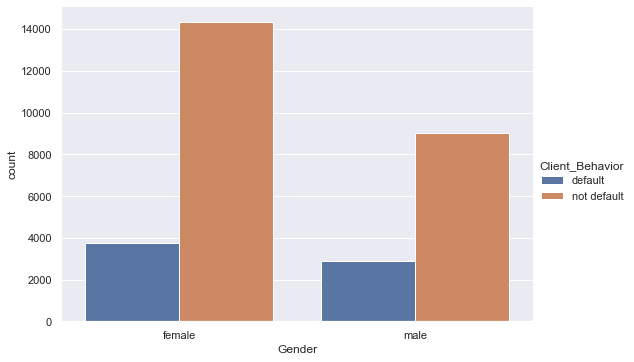

In [52]:
fg2 = sns.catplot(x = 'Gender', data=df, hue = 'Client_Behavior', kind='count', aspect=1.5)
fg2.set_xlabels('Gender')

In [83]:
# Percent of each client behavior as a factor of Gender. 
df.groupby(['Gender','Client_Behavior'])['ID'].count()/df.groupby(['Gender'])['ID'].count()*100

Gender  Client_Behavior
female  default            20.776281
        not default        79.223719
male    default            24.167227
        not default        75.832773
Name: ID, dtype: float64

Most loans are provided to Females (60%), and to persons that are either Married or Single. From the figures above it appears that slightly more percentage of males (24%) defaulted on their loans compared to females (21%).

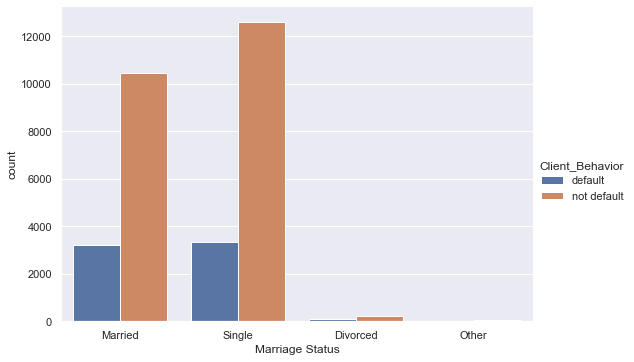

In [62]:
fg2_2 = sns.catplot(x = 'Marriage_Status', data=df, hue = 'Client_Behavior', kind='count', aspect=1.5)
fg2_2.set_xlabels('Marriage Status')

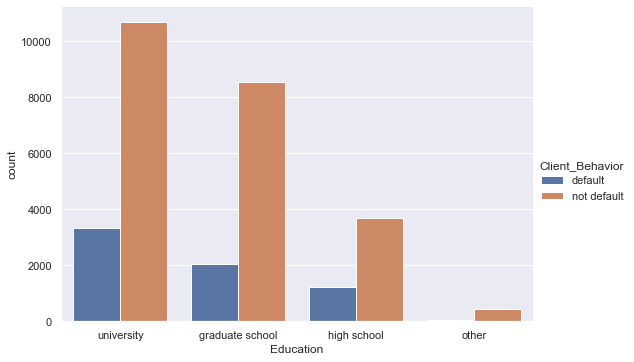

In [75]:
fg3 = sns.catplot(x = 'Education', data=df, hue = 'Client_Behavior',kind='count', aspect=1.5)
fg3.set_xlabels('Education')

In [81]:
# Percent of each client behavior as a factor of education. 
df.groupby(['Education','Client_Behavior'])['ID'].count()/df.groupby(['Education'])['ID'].count()*100

Education        Client_Behavior
graduate school  default            19.234766
                 not default        80.765234
high school      default            25.157616
                 not default        74.842384
other            default             7.051282
                 not default        92.948718
university       default            23.734854
                 not default        76.265146
Name: ID, dtype: float64

In terms of education, the greatest percentage to default on loans are high school (25%) > university (24%) > graduate school (19%) > other (7%). 

In [17]:
# Total number of Clients that Defaulted
defaulted = df[df['Client_Behavior_coded']== 1]
len(defaulted)

6636

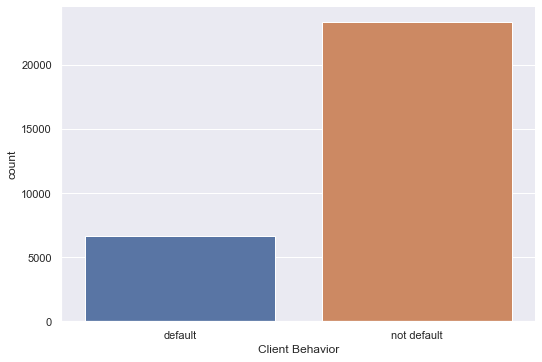

In [27]:
fg4 = sns.catplot(x = 'Client_Behavior', data=df, kind='count', aspect=1.5)
fg4.set_xlabels('Client Behavior')

In [87]:
# Comparing default between Gender, Marital Status, and Education. 
table = pd.crosstab(index=[df['Client_Behavior'],df['Education']], columns = [df['Gender'],df['Marriage_Status']])
table.unstack()

Gender                   female                                               \
Marriage_Status        Divorced                                      Married   
Education       graduate school high school other university graduate school   
Client_Behavior                                                                
default                       3          16     0         25             379   
not default                  17          51     6         74            1653   

Gender                                                                    ...  \
Marriage_Status                                        Other              ...   
Education       high school other university graduate school high school  ...   
Client_Behavior                                                           ...   
default                 451     7       1023               0           2  ...   
not default            1362   145       3449               3          30  ...   

Gender             male                                               \
Marriage_Status Married                      Other                     
Education         other university graduate school high school other   
Client_Behavior                                                        
default              10        643               0           2     0   
not default          72       1727               1          10     0   

Gender                                                                   
Marriage_Status                     Single                               
Education       university graduate school high school other university  
Client_Behavior                                                          
default                  0             506         229     4        746  
not default              1            2127         665    82       2194  

[2 rows x 32 columns]

In [37]:
# Restructure format of table 
table.columns.set_levels(['Female', 'Male'], level=0)
table.columns.set_levels(['Other','Married','Single','Divorced'], level=1)
table

Gender                            female                          male  \
Marriage_Status                 Divorced Married Other Single Divorced   
Client_Behavior Education                                                
default         graduate school        3     379     0    748       10   
                high school           16     451     2    223       11   
                other                  0       7     0     12        0   
                university            25    1023     1    873       19   
not default     graduate school       17    1653     3   3428       20   
                high school           51    1362    30    792       25   
                other                  6     145     0    128        2   
                university            74    3449     4   3207       44   

Gender                                                
Marriage_Status                 Married Other Single  
Client_Behavior Education                             
default         graduate school     390     0    506  
                high school         303     2    229  
                other                10     0      4  
                university          643     0    746  
not default     graduate school    1300     1   2127  
                high school         745    10    665  
                other                72     0     82  
                university         1727     1   2194

In [162]:
table.groupby(level=0).sum()

Gender            female                          male                     
Marriage_Status Divorced Married Other Single Divorced Married Other Single
Client_Behavior                                                            
default               44    1860     3   1856       40    1346     2   1485
not default          148    6609    37   7555       91    3844    12   5068

<AxesSubplot:xlabel='Client_Behavior,Education'>

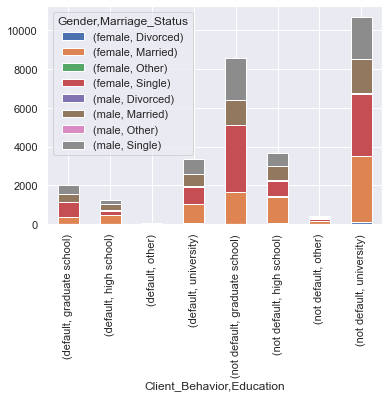

In [96]:
# Print table to show distrubution among groups
table.plot.bar(stacked=True)

Text(0.5, 1.0, "Distribution of Customers' Ages")

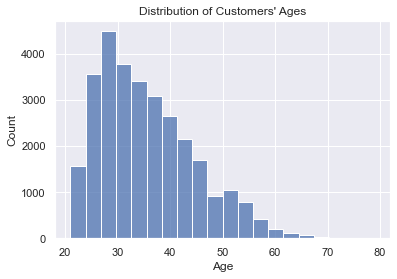

In [40]:
# Distribution of age
age_dist = sns.histplot(df['Age'], bins=20)
age_dist.set_title("Distribution of Customers' Ages")

In [20]:
print('Average and median age of customers are %0.f and %0.f years old, respectively.'%(df.Age.mean(), df.Age.median()))

Average and median age of customers are 35 and 34 years old, respectively.


In [21]:
df.Age.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Credit Given to Customers')

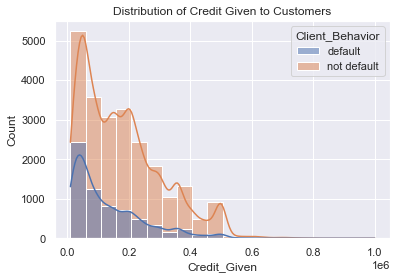

In [180]:
# Distribution of Credit Given
amt_dist = sns.histplot(x='Credit_Given', hue = 'Client_Behavior', data=df,bins=20, kde = True)
amt_dist.set_title("Distribution of Credit Given to Customers")

In [136]:
df.Credit_Given.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: Credit_Given, dtype: float64

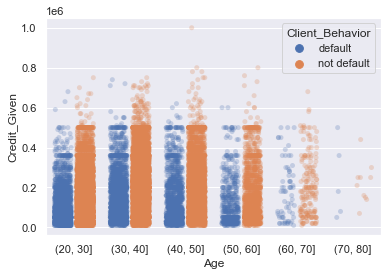

In [139]:
# Age and Credit given impact on client behavior
age_disc = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80])
age_scat = sns.stripplot(x= age_disc , y = 'Credit_Given', hue = 'Client_Behavior',data = df, jitter = 0.3,dodge=True, size=5, alpha=.25)

<AxesSubplot:xlabel='Age', ylabel='Credit_Given'>

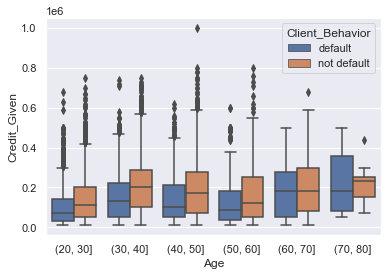

In [149]:
sns.boxplot(x= age_disc, y = 'Credit_Given', hue = 'Client_Behavior',data = df)

From the graph above, it looks like the number of loans gradually dropped off for those older than 60. The range of credit given is approximately the same for all age groups. 

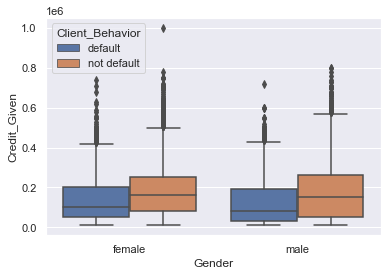

In [134]:
# Gender and Credit given impact on client behavior
sns.boxplot(x= 'Gender', y = 'Credit_Given', hue = 'Client_Behavior',data = df)

There is not a lot of separation between the amount of credit given between males and females. 

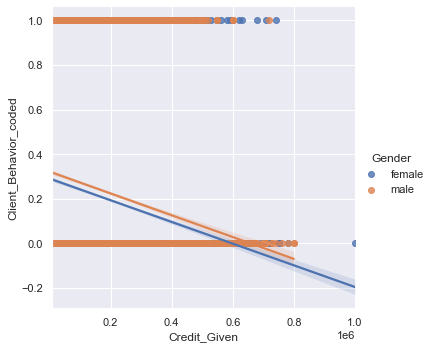

In [156]:
sns.lmplot(x = 'Credit_Given', y ='Client_Behavior_coded', hue='Gender', data=df)

The greater the amount of credit given, the rage of default decreases for both men and women. 

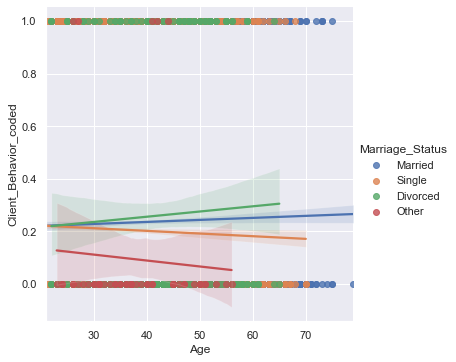

In [160]:
sns.lmplot(x = 'Age', y ='Client_Behavior_coded', hue='Marriage_Status', data=df)

In [200]:
# Distribution of Month to Month Status
df.groupby(['Client_Behavior','PH_Sept_05'])['ID'].count()

Client_Behavior  PH_Sept_05
default          -2              365
                 -1              954
                  0             1888
                  1             1252
                  2             1844
                  3              244
                  4               52
                  5               13
                  6                6
                  7                7
                  8               11
not default      -2             2394
                 -1             4732
                  0            12849
                  1             2436
                  2              823
                  3               78
                  4               24
                  5               13
                  6                5
                  7                2
                  8                8
Name: ID, dtype: int64

In [214]:
#behavior_df = df.groupby(['Client_Behavior','PH_Sept_05']).count()['ID'].plot(legend=True)
behavior_df = df.groupby(['Client_Behavior','PH_Sept_05']).agg(customers = ('ID','count'))
behavior_df

customers
Client_Behavior PH_Sept_05           
default         -2                365
                -1                954
                 0               1888
                 1               1252
                 2               1844
                 3                244
                 4                 52
                 5                 13
                 6                  6
                 7                  7
                 8                 11
not default     -2               2394
                -1               4732
                 0              12849
                 1               2436
                 2                823
                 3                 78
                 4                 24
                 5                 13
                 6                  5
                 7                  2
                 8                  8

<AxesSubplot:xlabel='PH_Sept_05', ylabel='customers'>

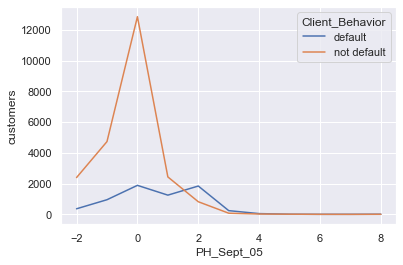

In [215]:
sns.lineplot(x='PH_Sept_05', y='customers',hue='Client_Behavior', data=behavior_df)

In [242]:
# Comparing how April Status May affect subsequent month Status 
table2 = pd.crosstab(index=[df['PH_Apr_05'],df['PH_May_05']], columns = [df['Client_Behavior']])
table2.unstack()

Client_Behavior default                                                     \
PH_May_05            -2     -1       0       2     3     4    5    6     7   
PH_Apr_05                                                                    
-2                806.0   71.0    81.0    23.0   NaN   NaN  NaN  NaN   NaN   
-1                 89.0  661.0   199.0    26.0   NaN   NaN  NaN  NaN   NaN   
 0                  NaN  117.0  2639.0   313.0   NaN   NaN  NaN  NaN   NaN   
 2                  NaN   42.0   256.0  1019.0  84.0   NaN  NaN  NaN   NaN   
 3                  NaN    6.0    19.0    31.0  25.0  37.0  NaN  NaN   NaN   
 4                  NaN    NaN     NaN     8.0   3.0  14.0  6.0  NaN   NaN   
 5                  NaN    NaN     NaN     2.0   1.0   0.0  2.0  2.0   NaN   
 6                  NaN    0.0     1.0     1.0   NaN   0.0  2.0  1.0   9.0   
 7                  NaN    NaN     NaN     NaN   NaN   NaN  NaN  NaN  38.0   
 8                  NaN    NaN     NaN     NaN   NaN   NaN  NaN  NaN   1.0   

Client_Behavior      not default                                           \
PH_May_05          8          -2      -1        0      2     3     4    5   
PH_Apr_05                                                                   
-2               NaN      3296.0   315.0    273.0   30.0   NaN   NaN  NaN   
-1               NaN       355.0  3449.0    895.0   66.0   NaN   NaN  NaN   
 0               NaN         NaN   717.0  12096.0  404.0   NaN   NaN  NaN   
 2               NaN         NaN   156.0    476.0  683.0  50.0   NaN  NaN   
 3               NaN         NaN     4.0     12.0   16.0  12.0  22.0  NaN   
 4               NaN         NaN     NaN      NaN    1.0   2.0   9.0  6.0   
 5               NaN         NaN     NaN      NaN    2.0   1.0   1.0  1.0   
 6               NaN         NaN     1.0      0.0    1.0   NaN   1.0  0.0   
 7               NaN         NaN     NaN      NaN    NaN   NaN   NaN  NaN   
 8               1.0         NaN     NaN      NaN    NaN   NaN   NaN  NaN   

Client_Behavior                 
PH_May_05          6    7    8  
PH_Apr_05                       
-2               NaN  NaN  NaN  
-1               NaN  NaN  NaN  
 0               NaN  NaN  NaN  
 2               NaN  NaN  NaN  
 3               NaN  NaN  NaN  
 4               NaN  NaN  NaN  
 5               1.0  NaN  NaN  
 6               0.0  2.0  NaN  
 7               NaN  8.0  NaN  
 8               NaN  0.0  0.0

 ~~~
 -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 
    1 = payment delay for one month; 2 = payment delay for two months; . . .; 
    8 = payment delay for eight months; 9 = payment delay for nine months and above.
 ~~~

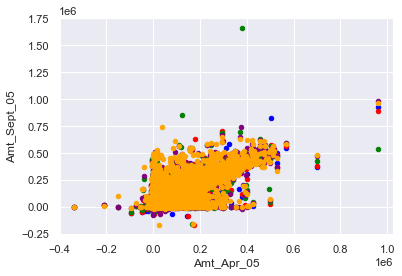

In [271]:
# Scatter plot show how correlated April Bill correlates to future bills 
#x = df['Amt_Sept_05']
#y = df['Amt_Aug_05']
#plt.scatter(x,y)
ax = plt.gca()
#df.plot(kind = 'scatter', x =['Amt_Apr_05','Amt_Apr_05','Amt_Apr_05'], y=['Amt_May_05','Amt_Jun_05','Amt_Jul_05'], stacked = True)
df.plot(kind = 'scatter', x ='Amt_Apr_05', y='Amt_May_05',color = 'blue', ax = ax)
df.plot(kind = 'scatter', x ='Amt_Apr_05', y='Amt_Jun_05',color = 'red', ax = ax)
df.plot(kind = 'scatter', x ='Amt_Apr_05', y='Amt_Jul_05',color = 'green', ax = ax)
df.plot(kind = 'scatter', x ='Amt_Apr_05', y='Amt_Aug_05',color = 'purple', ax = ax)
df.plot(kind = 'scatter', x ='Amt_Apr_05', y='Amt_Sept_05',color = 'orange', ax = ax)

plt.show()

There is a positive linear correlation between a month's bill amount and the subsequent months bill amount. This pattern is seen repeated for all of the bill months below. 

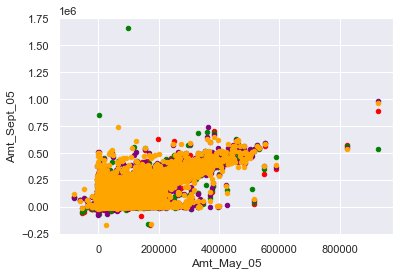

In [275]:
# Scatter plot show how correlated May Bill correlates to future bills 
ax = plt.gca()
df.plot(kind = 'scatter', x ='Amt_May_05', y='Amt_Jun_05',color = 'red', ax = ax)
df.plot(kind = 'scatter', x ='Amt_May_05', y='Amt_Jul_05',color = 'green', ax = ax)
df.plot(kind = 'scatter', x ='Amt_May_05', y='Amt_Aug_05',color = 'purple', ax = ax)
df.plot(kind = 'scatter', x ='Amt_May_05', y='Amt_Sept_05',color = 'orange', ax = ax)
plt.show()

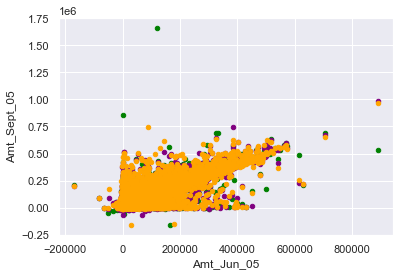

In [276]:
# Scatter plot show how correlated May Bill correlates to future bills 
ax = plt.gca()
df.plot(kind = 'scatter', x ='Amt_Jun_05', y='Amt_Jul_05',color = 'green', ax = ax)
df.plot(kind = 'scatter', x ='Amt_Jun_05', y='Amt_Aug_05',color = 'purple', ax = ax)
df.plot(kind = 'scatter', x ='Amt_Jun_05', y='Amt_Sept_05',color = 'orange', ax = ax)
plt.show()

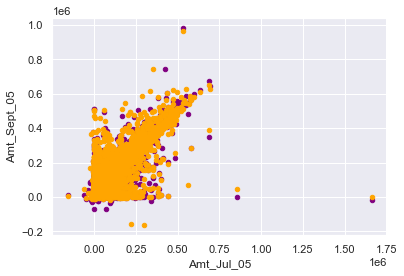

In [277]:
# Scatter plot show how correlated May Bill correlates to future bills 
ax = plt.gca()
df.plot(kind = 'scatter', x ='Amt_Jul_05', y='Amt_Aug_05',color = 'purple', ax = ax)
df.plot(kind = 'scatter', x ='Amt_Jul_05', y='Amt_Sept_05',color = 'orange', ax = ax)
plt.show()

In [278]:
df.min()

Unnamed: 0                             1
ID                                     1
Credit_Given                       10000
Gender                            female
Education                graduate school
Marital_Status                         0
Age                                   21
PH_Sept_05                            -2
PH_Aug_05                             -2
PH_Jul_05                             -2
PH_Jun_05                             -2
PH_May_05                             -2
PH_Apr_05                             -2
Amt_Sept_05                      -165580
Amt_Aug_05                        -69777
Amt_Jul_05                       -157264
Amt_Jun_05                       -170000
Amt_May_05                        -81334
Amt_Apr_05                       -339603
PAmt_Sept_05                           0
PAmt_Aug_05                            0
PAmt_Jul_05                            0
PAmt_Jun_05                            0
PAmt_May_05                            0
PAmt_Apr_05     

Some of the bill statements are in the negative, which is interesting. I believe this means that these customers are owed money. 

In [296]:
bill_client = pd.DataFrame(data = df, columns = ['Amt_Apr_05','Amt_May_05','Amt_Jun_05','Amt_Jul_05','Amt_Aug_05','Amt_Sept_05'])
bill_client['Max_bill'] = bill_client.max(axis = 1) 
bill_client['Credit_Given']=df['Credit_Given']
bill_client['Max_Cred_Used']= bill_client['Max_bill']/bill_client['Credit_Given']
bill_client['Customer_Behavior_coded']=df['Client_Behavior_coded']
bill_client['Customer_Behavior']=df['Client_Behavior']
bill_client.head()

,Amt_Apr_05,Amt_May_05,Amt_Jun_05,Amt_Jul_05,Amt_Aug_05,Amt_Sept_05,Max_bill,Credit_Given,Max_Cred_Used,Customer_Behavior_coded,Customer_Behavior
0,0,0,0,689,3102,3913,3913,20000,0.195650,1,default
1,3261,3455,3272,2682,1725,2682,3455,120000,0.028792,1,default
2,15549,14948,14331,13559,14027,29239,29239,90000,0.324878,0,not default
3,29547,28959,28314,49291,48233,46990,49291,50000,0.985820,0,not default
4,19131,19146,20940,35835,5670,8617,35835,50000,0.716700,0,not default


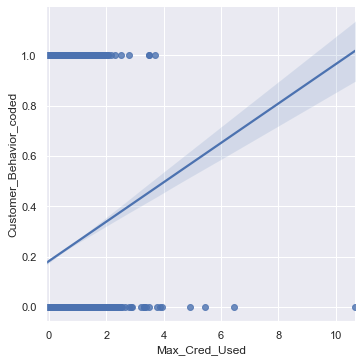

In [294]:
sns.lmplot(x = 'Max_Cred_Used', y ='Customer_Behavior_coded', data=bill_client)
plt.show()

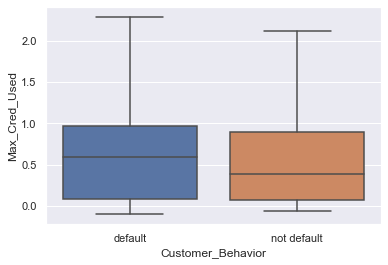

In [298]:
sns.boxplot(x = 'Customer_Behavior', y = 'Max_Cred_Used', data=bill_client, showfliers = False)
plt.show()